Hi Bjarni, I know you hate python notebooks but I found it to be the best way in this scenario 
to explain the classes that I have created. In this tutorial I will try to guide you through all the functions
that I made.

#the file twitLogin contains my login information for twitter, so we cannot put it on github. You can find this
file in our dropbox folder

In [1]:
#In the twitter API there is a difference between streaming tweets - i.e. catching all the new tweets that are coming in - and 
#searching for tweets in the past. we will first show how to stream the tweets using one of my functions

#I import a lot of stuff because I am too lazy to see what I actually need
import tweepy
from streamtwit import *
from twitlogin import *
import threading
import pandas as pd

import sys
import os



tweets_data_path = 'braggitutorial.json'
test = open(tweets_data_path, 'w+') 
test.close()

keyword = 'trump' #we will search all tweets with this keyword
duration = 10 #time in seconds we want to keep streaming

def quitStream():
    print('stream will end after the next tweet')
    stream.disconnect()
    
t = threading.Timer(duration, quitStream)
t.start()  

l = StdOutListener(tweets_data_path)
stream = Stream(twitLogin(), l) #twitLogin() is a 
streamdata = stream.filter(track=[keyword]) #Can also use things like locations=[-74.0231,45.3299,-73.3846,45.7311]

stream will end after the next tweet


In [3]:
#if the universe is deterministic and you have all the packages installed, you should have a 
#file called braggitutorial.json on your computer containing tweets related to the Donald. If this doesn't
#work change the keyword, as there are some bugs that need to be fixed. Changing the keyword can also help later on

#now we are gonna read the file and put it in a format we like

welovetrump = TwitData().readTwitFile(tweets_data_path) #function I wrote that reads the file
finaltrumpfile = TwitData().formatTwitData(welovetrump) #will put the file in a nice format from the pandas package


In [6]:
#we can look at our final file and see how it is formatted. We can easily add any other properties to this table
#if we want, but the function is not very flexible yet. Also if a certain tweet doesnt have a certain property, it will 
#give errors so we need to change that

finaltrumpfile; #remove the ; if you want to see the result

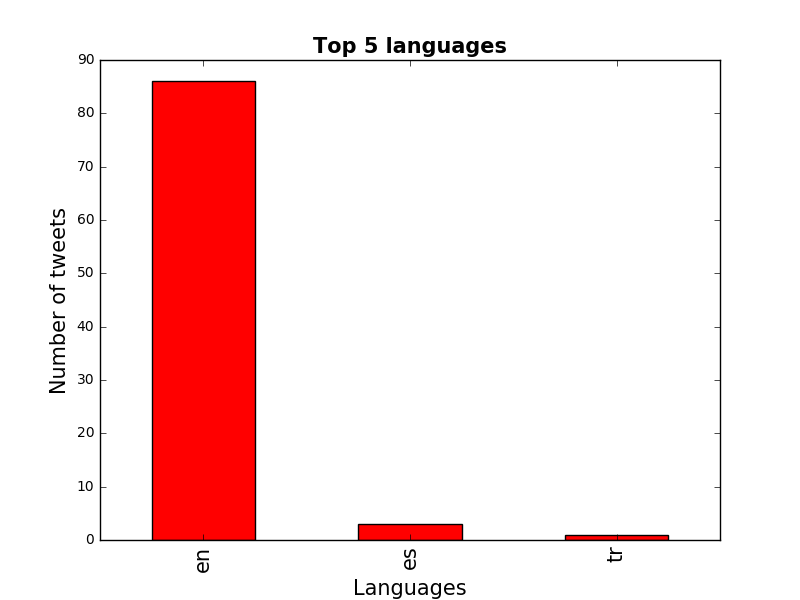

In [7]:
#we can easily plot data from this file: you probably need to install ipython

from IPython.display import *

def displayPlot(plt):
    plt.savefig("temp_plot.png")
    display(Image(filename='temp_plot.png'))
   
    
tweets_by_lang = finaltrumpfile['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:3].plot(ax=ax, kind='bar', color='red')

displayPlot(fig)

In [8]:
#We can also mine historical tweets with another function I wrote. Let's now look for something else than donald J. Trump.
#at the moment we can only use dates. For instance, let's look how often the word tomato was mentioned in dutch(tomaat)

#because many results will cause my poor computer to sweat, lets only take the last 10 results


tweets_data_path2 = 'braggitutorial2.json'
test = open(tweets_data_path, 'w+') 
test.close()

#takes arguments keyword, where to write file, from when and until when(nothing will search all history available) 
#language and the amount of items you want it to find. 
tomaatmentions = TwitScrape().scrapeKeyword( 'tomaat' ,tweets_data_path2 , since = '2016-6-22', until = '2016-6-26', language = 'nl', items = 10)
#we can read this file in the same way as we did before

In [11]:
#there are two more lame functions I wrote. They will give you all your friends and all your tweets:

following = TwitScrape().followingList() #I think I am only following obama in hilary, youll see if you evaluate following

usertweets = TwitScrape().scrapeUsertweets()

#if errorcode 429 occurs, it is because our API is limited, Which means we can only do a certain amount of requests. 
#I will probably create another user so we can switch in this scenario.

#I have to find a way to be more careful with my login requests


TweepError: Twitter error response: status code = 429